In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('files/KAG_energydata_complete.csv')
pd.set_option("display.max_columns",30)

In [4]:
df.head(50)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.100000,48.590000,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,45.790000,17.100000,54.966667,6.263333,86.090000,17.133333,41.200000,18.100000,48.590000,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,45.863333,17.100000,54.900000,6.190000,86.423333,17.100000,41.200000,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,45.790000,17.166667,55.000000,6.123333,87.226667,17.166667,41.400000,18.100000,48.590000,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,46.096667,17.100000,55.000000,6.190000,87.626667,17.200000,41.500000,18.100000,48.590000,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [4]:
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [5]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
scaled_data =pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
scaled_data

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,-1.314903,0.471160,-0.145196,0.951798,-1.453646,1.219861,-1.957509,1.141572,-1.217324,0.958136,-0.152647,-2.976328,0.822080,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,-1.314903,0.471160,-0.176941,0.945592,-1.453646,1.206825,-1.957509,1.134554,-1.200778,0.965363,-0.174588,-2.962813,0.822080,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,-1.314903,0.458968,-0.221822,0.916484,-1.453646,1.182057,-1.957509,1.109032,-1.233869,0.950910,-0.196529,-2.949298,0.822080,0.935713,1.441572,0.319294,0.252109,0.252109
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,-1.314903,0.458968,-0.242621,0.925045,-1.485243,1.154030,-2.008631,1.082233,-1.233869,0.926821,-0.218470,-2.935783,0.822080,0.799723,1.116559,0.295454,1.408801,1.408801
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,-1.296832,0.458968,-0.253567,0.972238,-1.453646,1.142298,-2.008631,1.082233,-1.233869,0.926821,-0.240411,-2.922268,0.822080,0.663733,0.791547,0.271613,-1.028122,-1.028122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.022483,-0.479080,2.415962,1.583299,2.530318,0.394449,2.458745,0.590209,1.882026,1.511812,1.955947,0.160801,2.772610,-1.721052,2.006168,1.781709,1.365409,1.366295,1.843571,1.261649,2.881489,-0.043599,-1.616282,-0.288198,-1.243314,2.282163,1.249203,1.249203
19731,-0.075056,-0.479080,2.374452,1.568221,2.468301,0.407788,2.425512,0.608646,1.882026,1.511812,1.972211,0.152673,2.674091,-1.721052,2.033251,1.764949,1.365409,1.311932,1.843571,1.261649,2.856414,-0.043599,-1.593912,-0.220203,-1.172659,2.274216,1.675942,1.675942
19732,1.680659,0.781035,2.374452,1.592514,2.411103,0.576982,2.383971,0.752037,1.882026,1.544061,1.972211,0.146022,2.580498,-1.721052,2.025126,1.762155,1.365409,1.287048,1.843571,1.261649,2.831338,-0.043599,-1.571542,-0.152208,-1.102004,2.266269,0.290494,0.290494
19733,3.143756,0.781035,2.374452,1.691361,2.313256,0.642694,2.304213,0.629130,1.882026,1.557883,1.955947,0.138633,2.384554,-1.721052,2.006168,1.741763,1.346238,1.260011,1.843571,1.268273,2.806263,-0.043599,-1.549171,-0.084213,-1.031349,2.258322,-1.287590,-1.287590


In [6]:
X=scaled_data.drop('Appliances',axis=1)
y=scaled_data['Appliances']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

# Model Building

In [8]:
from sklearn.linear_model import LinearRegression
linear_regression_model=LinearRegression()
linear_regression_model.fit(X_train,y_train)
y_pred=linear_regression_model.predict(X_test)
r2_score(y_test,y_pred)

0.16857703510874933

In [9]:
from sklearn.ensemble import RandomForestRegressor
random_forest_model =RandomForestRegressor()
random_forest_model.fit(X_train,y_train)
y_pred =random_forest_model.predict(X_test)
r2_score(y_test,y_pred)

0.48357943541839044

In [10]:
feature_imp =random_forest_model.feature_importances_

In [11]:
feautres = pd.DataFrame(sorted(zip(df.columns,feature_imp,)),columns=['feature','feature_imp'])\
                            .sort_values(by='feature_imp',ascending=False)
feautres.reset_index(inplace=True)

In [12]:
feautres

,index,feature,feature_imp
0,1,Press_mm_hg,0.062120
1,12,T1,0.060146
2,21,T_out,0.052457
3,16,T5,0.049409
4,19,T8,0.048900
5,13,T2,0.046490
6,0,Appliances,0.046167
7,8,RH_7,0.045907
8,14,T3,0.045528
9,3,RH_2,0.043924


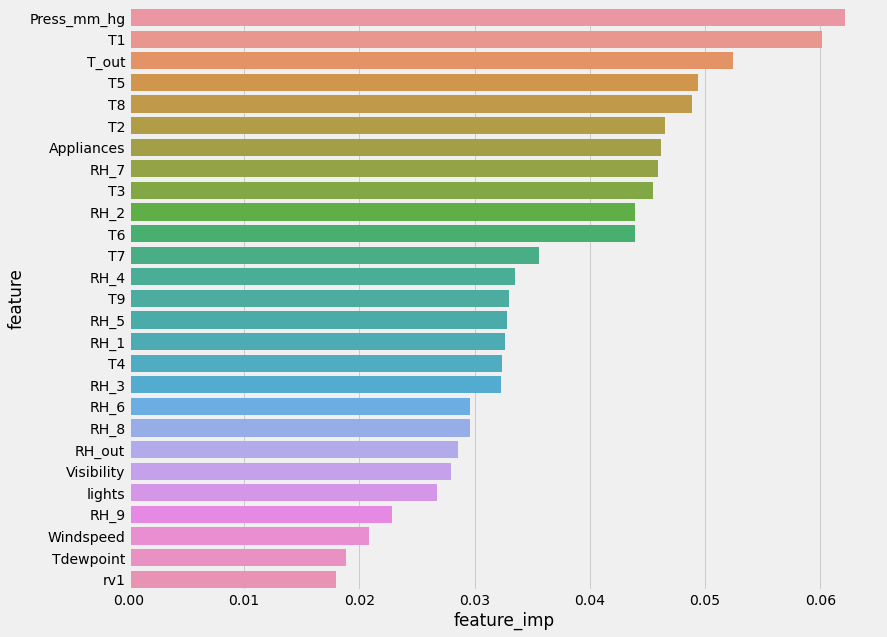

In [13]:
plt.figure(figsize=(12,10))
sns.barplot(x='feature_imp',y='feature',data=feautres)

In [14]:
from sklearn.tree import DecisionTreeRegressor
dt_model =DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
y_pred =dt_model.predict(X_test)
r2_score(y_test,y_pred)

0.08705685717252165

In [15]:
random_forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Model Implementation

We will be looking at following Algorithms 

**Improved Linear regression models**

1.Ridge regression 

2.Lasso regression 

**Support Vector Machine**

3.Support vector regression 

**Nearest neighbour Regressor**

4.KNeighborsRegressor

**Ensmble models**

5.Random Forest Regressor

6.Gradient Boosting Regressor

7.ExtraTrees Regressor

**Neural Network**

8.Multi Layer Preceptron Regressor



In [19]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR


In [20]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor()] ,
           ['MLPRegressor: ', MLPRegressor(  activation='relu', solver='adam',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01)]
         ]


In [21]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics

model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [22]:
model_data

[{'Name': 'Lasso: ',
  'Train_Time': 0.012013435363769531,
  'Train_R2_Score': 0.0,
  'Test_R2_Score': -2.6464047795382584e-06,
  'Test_RMSE_Score': 1.0100132151650592},
 {'Name': 'Ridge: ',
  'Train_Time': 0.008008241653442383,
  'Train_R2_Score': 0.16249888633195053,
  'Test_R2_Score': 0.1685591718386248,
  'Test_RMSE_Score': 0.9209629413566807},
 {'Name': 'KNeighborsRegressor: ',
  'Train_Time': 0.13747739791870117,
  'Train_R2_Score': 0.5722611734415006,
  'Test_R2_Score': 0.33522321866959437,
  'Test_RMSE_Score': 0.8235015155127318},
 {'Name': 'SVR:',
  'Train_Time': 6.908160448074341,
  'Train_R2_Score': 0.26131462291805096,
  'Test_R2_Score': 0.21755585979482328,
  'Test_RMSE_Score': 0.8934148209457342},
 {'Name': 'RandomForest ',
  'Train_Time': 29.678309440612793,
  'Train_R2_Score': 0.9294629903972853,
  'Test_R2_Score': 0.48504615686111474,
  'Test_RMSE_Score': 0.724787397640966},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 7.911418199539185,
  'Train_R2_Score': 1.0,
 

In [23]:
# Convert list to dataframe
result = pd.DataFrame(model_data)

In [24]:
result

,Name,Train_Time,Train_R2_Score,Test_R2_Score,Test_RMSE_Score
0,Lasso:,0.012013,0.000000,-0.000003,1.010013
1,Ridge:,0.008008,0.162499,0.168559,0.920963
2,KNeighborsRegressor:,0.137477,0.572261,0.335223,0.823502
3,SVR:,6.908160,0.261315,0.217556,0.893415
4,RandomForest,29.678309,0.929463,0.485046,0.724787
5,ExtraTreeRegressor :,7.911418,1.000000,0.546800,0.679941
6,GradientBoostingClassifier:,6.990670,0.345104,0.250739,0.874265
7,XGBRegressor:,1.256626,0.862843,0.451106,0.748292
8,MLPRegressor:,10.334511,0.492506,0.343922,0.818096


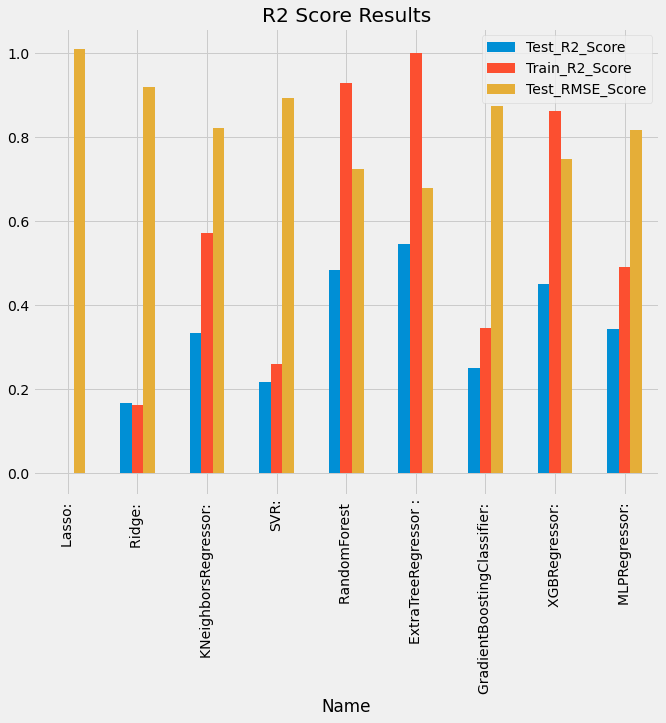

In [27]:
result.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score' , 'Test_RMSE_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (10,8)) ;

In [30]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 11.0min finished


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [32]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(X_train,y_train)

1.0

In [33]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(X_test,y_test)

0.5840488717994157

In [36]:
import pickle 
with open('model.pkl','wb')  as model:
    pickle.dump(grid_search,model)

In [ ]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))